# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from dataclasses import dataclass, field
from typing import Callable, Union

import warnings
warnings.filterwarnings('ignore')


# Data imputation
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

# Feature Selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

# Models
from sklearn.tree import DecisionTreeRegressor


# import Label encoding
from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [94]:
# Change some pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("precision", 10)

# Data acquisition

In [133]:
# Read data
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")


In [134]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data preparation

In [135]:
df_train.shape

(1460, 81)

## Feature Modification

### Adding features

In [136]:
df_train['DateSold'] = df_train[['YrSold', 'MoSold']].astype(str).agg('-'.join, axis=1)
df_train['HouseAge'] = df_train['YrSold'] - df_train['YearBuilt']

### Changing data type

In [137]:
# Change some features to categorical 
cols = ['MSSubClass', 
        'BsmtFullBath', 
        'BsmtHalfBath', 
        'FullBath', 
        'HalfBath', 
        'BedroomAbvGr', 
        'KitchenAbvGr', 
        'TotRmsAbvGrd', 
        'Fireplaces',
        'GarageCars',
        '3SsnPorch',
        'MiscVal',
    ]
df_train[cols] = df_train[cols].astype('object')

df_train['OverallQual'] = df_train['OverallQual'].map({
                            10:	"Very Excellent",
                            9:	"Excellent",
                            8:	"Very Good",
                            7:	"Good",
                            6:	"Above Average",
                            5:	"Average",
                            4:	"Below Average",
                            3:	"Fair",
                            2:	"Poor",
                            1:	"Very Poor"
                        })


df_train['OverallCond'] = df_train['OverallCond'].map({
                            10:	"Very Excellent",
                            9:	"Excellent",
                            8:	"Very Good",
                            7:	"Good",
                            6:	"Above Average",
                            5:	"Average",
                            4:	"Below Average",
                            3:	"Fair",
                            2:	"Poor",
                            1:	"Very Poor"
                        })

categorical_feat = df_train.select_dtypes(include=['object']).columns
numerical_feat = df_train.select_dtypes(np.number).columns[1:]



In [138]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Data checking
- Checking for wrong entries like symbols -,?,#,*,etc.

*Observation*:
- No strange values are found.

In [139]:
def get_values_count(data:pd.DataFrame) -> None:
    """
    Calculate the values count for each feature in the DataFrame
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    
    Returns
    -------
    values_count : DataFrame contains values count for each feature
    """
    print("--Value counts in each features--")
    for col in data.columns:
        val_cnts = data[col].value_counts(dropna=False).to_dict()
        if(len(val_cnts)>15):
            continue
        print(f"{col} :{val_cnts}")

def get_unique_values(data:pd.DataFrame):
    """
    Get unique values in each feature
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    
    Returns
    -------
    unique_values : DataFrame contains unique values for each feature
    """
    print("--Unique values in each features--")
    for col in data.columns:
        unique_values = data[col].unique()
        if(len(unique_values)>100):
            continue
        print(f"{col:<20}:{str(unique_values):^20}")
    

get_unique_values(df_train)


--Unique values in each features--
MSSubClass          :[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning            :['RL' 'RM' 'C (all)' 'FV' 'RH']
Street              :  ['Pave' 'Grvl']   
Alley               :[nan 'Grvl' 'Pave'] 
LotShape            :['Reg' 'IR1' 'IR2' 'IR3']
LandContour         :['Lvl' 'Bnk' 'Low' 'HLS']
Utilities           :['AllPub' 'NoSeWa'] 
LotConfig           :['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope           :['Gtl' 'Mod' 'Sev'] 
Neighborhood        :['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1          :['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2          :['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType            :['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  

## Missing values
- There huge missing values found in the features: **PoolQC** & **MiscFeature** & **Alley** & **Fence**, as a result will remove them later.

--Missing values count--
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageCond        81
GarageYrBlt       81
GarageQual        81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64


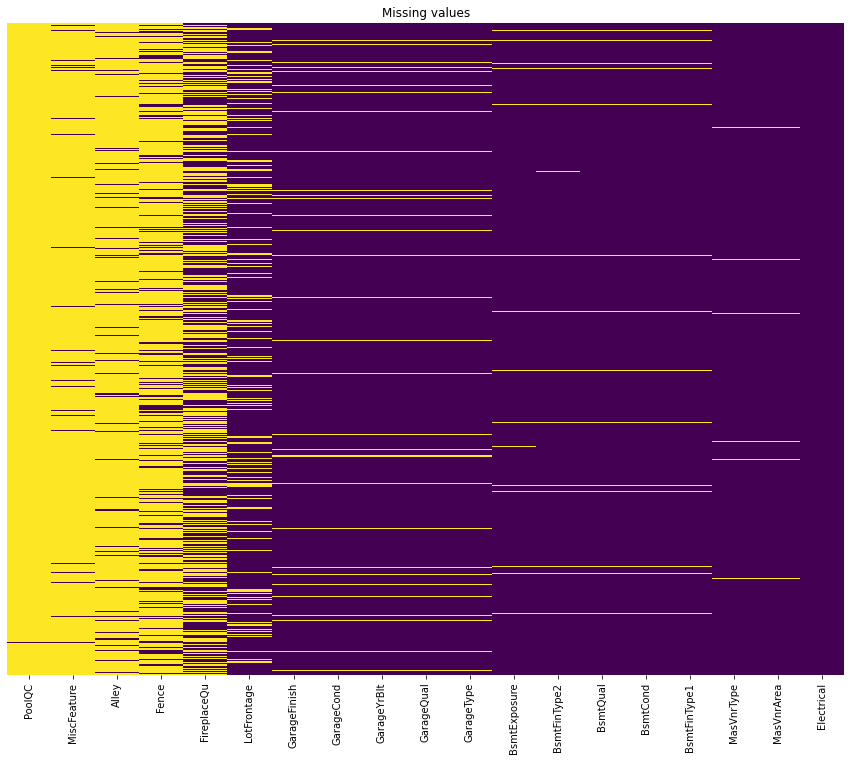

In [140]:
def check_missing_vals(data:pd.DataFrame):
    """
    Check the presence of Null values in each feature
    
    Parameters
    ----------
    data : DataFrame
    """
    missing_vals = df_train.isnull().sum().sort_values(ascending=False)
    
    # Print only columns that include missing values
    print(f"--Missing values count--\n{missing_vals[missing_vals!=0]}")

    # Plot heatmap of columns that include missing values
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(data.isnull()[missing_vals[missing_vals!=0].index], yticklabels=False, cbar=False, cmap='viridis')
    ax.set_title("Missing values")
    
    
check_missing_vals(df_train)

## Duplicates values

In [141]:
def remove_dup(data: pd.DataFrame):
    """ Remove duplicates values if exist"""
    print(f"Duplicates count before droping:{data.duplicated().sum()}")
    data.drop_duplicates(inplace=True)
    print(f"Duplicates count after droping:{data.duplicated().sum()}")
    print(f"Data dimension{data.shape}")

remove_dup(df_train)

Duplicates count before droping:0
Duplicates count after droping:0
Data dimension(1460, 83)


# EDA

## Statical analysis

### Numerical features

*Summary*:
- We noticing that there are many features have values equal to 0.


In [142]:
df_train.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.5,421.6,1.0,365.8,730.5,1095.2,1460.0
LotFrontage,1201.0,70.0,24.3,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,10516.8,9981.3,1300.0,7553.5,9478.5,11601.5,215245.0
YearBuilt,1460.0,1971.3,30.2,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1984.9,20.6,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1452.0,103.7,181.1,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1460.0,443.6,456.1,0.0,0.0,383.5,712.2,5644.0
BsmtFinSF2,1460.0,46.5,161.3,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1460.0,567.2,441.9,0.0,223.0,477.5,808.0,2336.0
TotalBsmtSF,1460.0,1057.4,438.7,0.0,795.8,991.5,1298.2,6110.0


### Categorical features

In [143]:
df_train.describe(include=['O']).T

,count,unique,top,freq
MSSubClass,1460,15,20,536
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225


## Univariate analysis

### Numerical variables
- The target variable (price) has right skewness
- the goal is to transform the target variable to a normal distribution
- the transformation is done by the log transformation

- (lat, long) variables don't follow the normal distribution so we can apply some transformation techniques to change them into normal distribution so We can't apply log function because their PDFs aren't the same shape of (price) variable

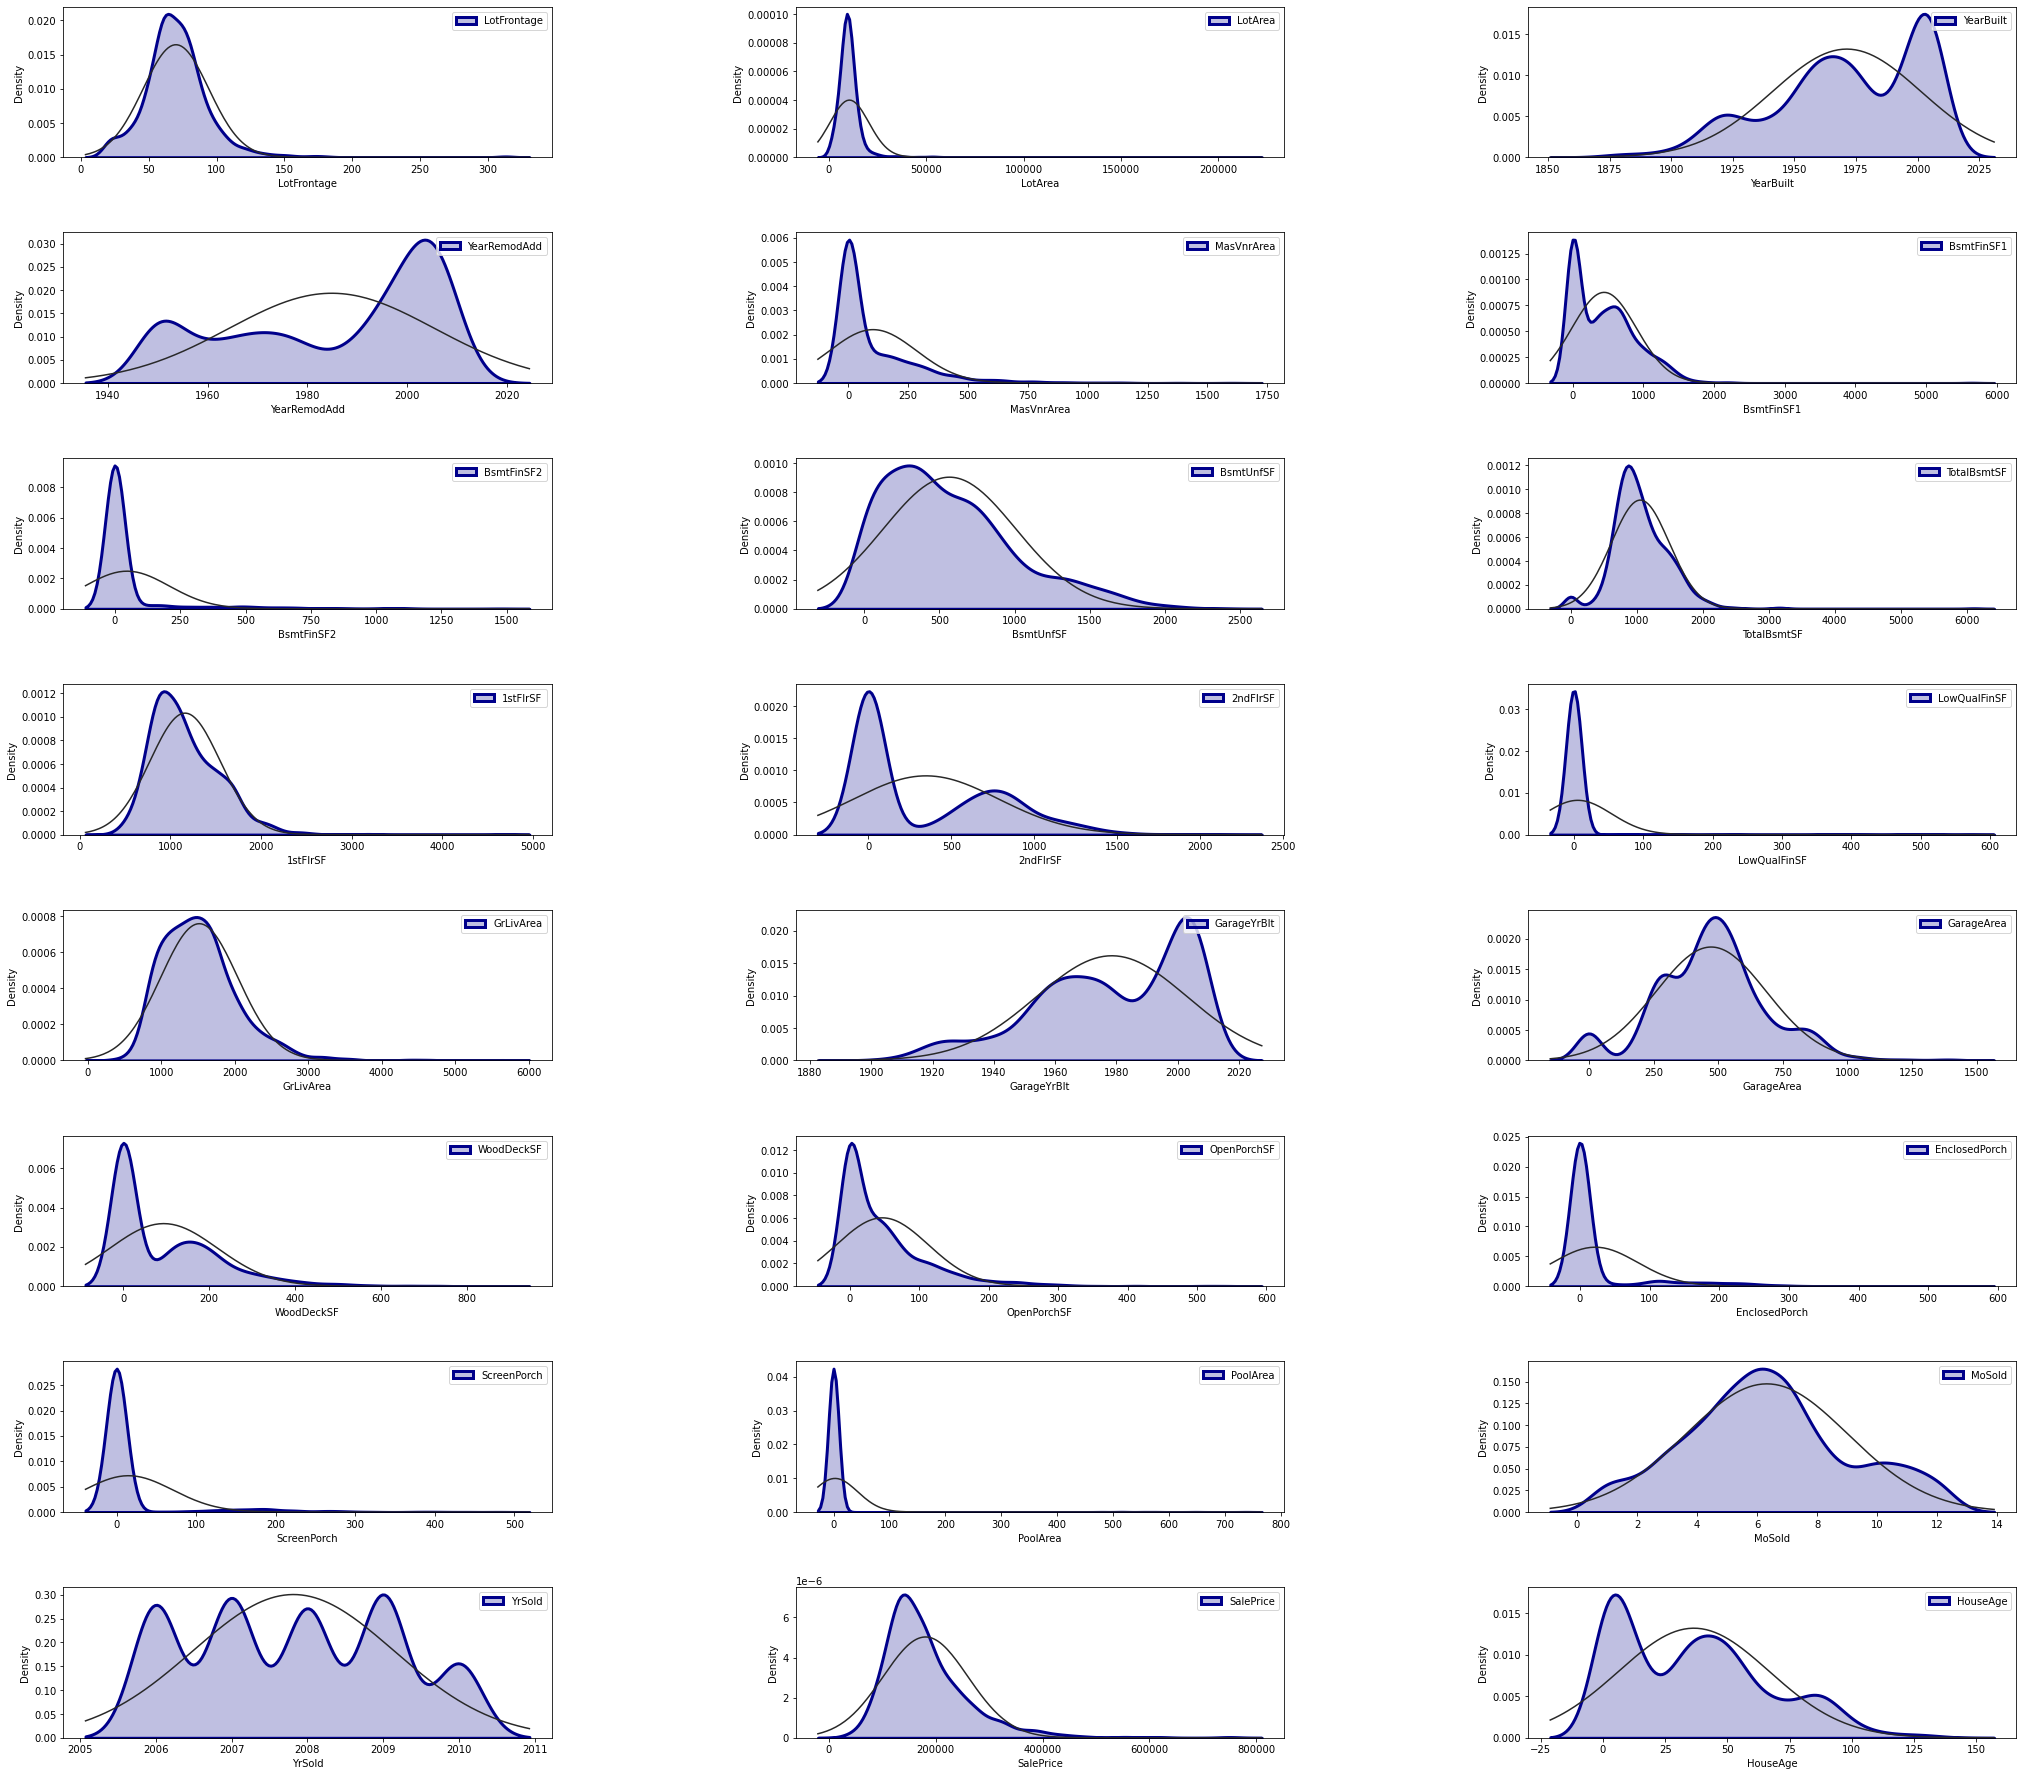

In [162]:
# plot the kde of numerical features
def plot_kde(data:pd.DataFrame):
    """
    Plot the kde of numerical features
        
    Parameters
    ----------
    data : DataFrame
    """

    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.5, hspace=0.5)
    

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.distplot(data[col], fit=stats.norm, hist=False, kde=True, 
                     kde_kws={'linewidth': 3, 'shade': True, 'color': 'darkblue'}, 
                     label=col, ax=ax)        
        # plt.title(col)
        plt.legend()

plot_kde(df_train[numerical_feat])


### Categorical variables

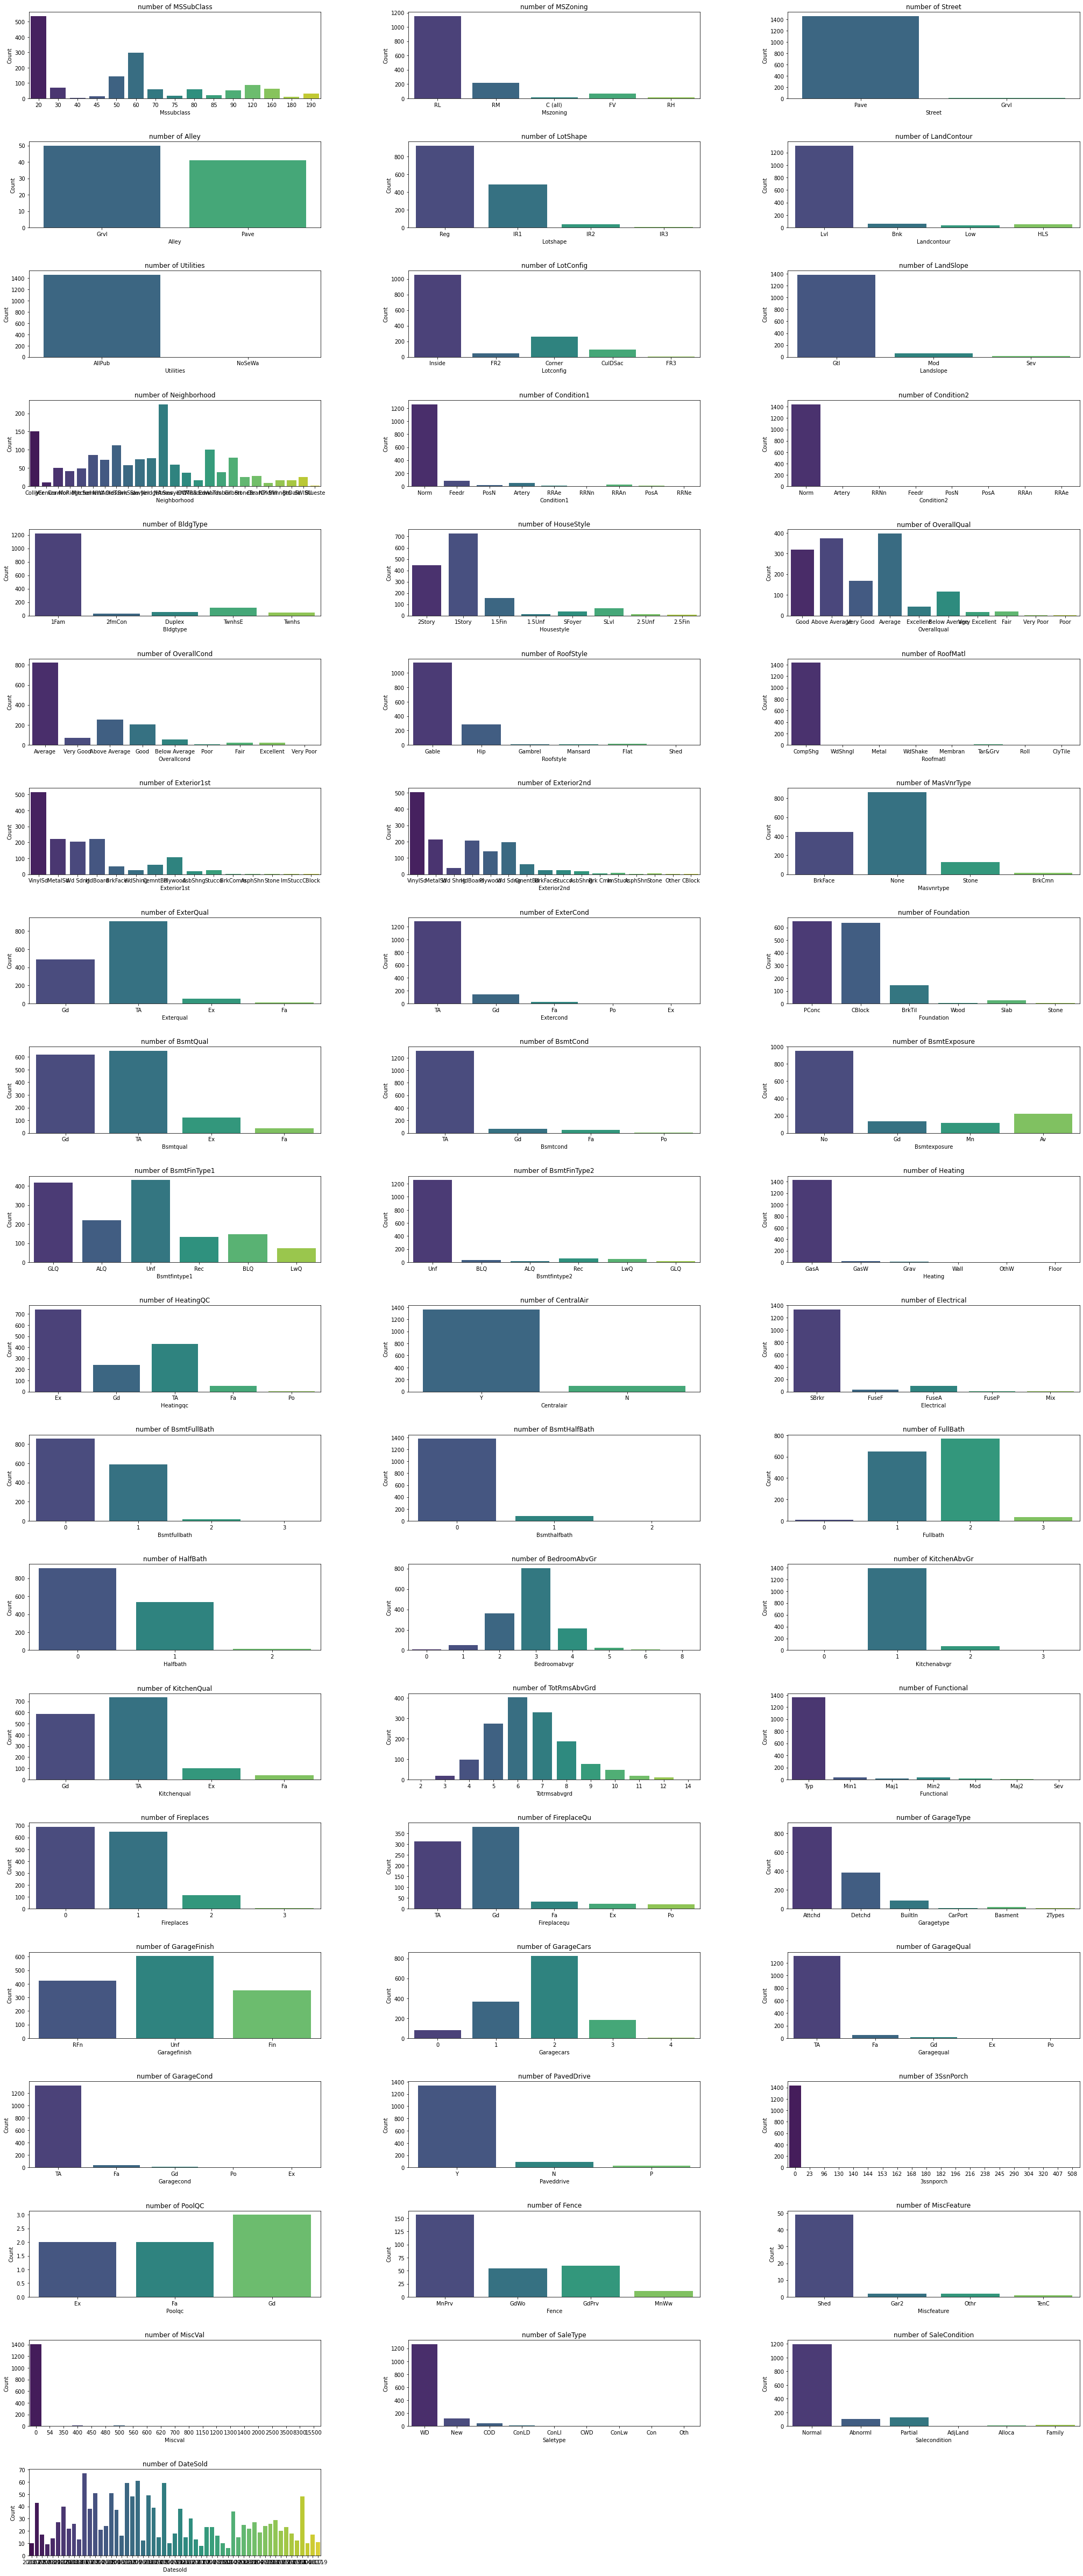

In [163]:
# plot countplot for categorical features
def plot_count_plot(data:pd.DataFrame):
    """
    Plot countplot for categorical features
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    """
    figure = plt.figure(figsize=(35, int(len(data.columns)*1.5)))
    figure.subplots_adjust(wspace=0.3, hspace=0.5)

    for i, col in enumerate(data.columns, start=1):
        ax = figure.add_subplot(len(data.columns)//3 + 1, 3, i)
        sns.countplot(x=col, data=data, ax=ax, palette='viridis')
        ax.set_title(f'number of {col}')
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel('Count')
        

plot_count_plot(df_train[categorical_feat])

## Bivariate analysis

### continuous - continuous variables

We notice that there is a good relation between **price** and **(sqft_living, sqft_living15, sqft_above, bathrooms, long)** and a poor realtion with **(lat, bathrooms, yr_built)** 

### price - continuous vars

*Correlation:*
- *Linear:*
    - There is a **positive linear correlation**  between **price** and **sqft_living** & **sqft_living15**&**sqft_above**.
    - There is **no good** correlation between **price** and **long** & **lat**.
    - There is a **good linear correlation** between **price** and **sqft_basement** but many instances have (0) value.

- *Monotonic:*
    - There is a **monotonic correlation**  between **price** and **sqft_lot** & **sqft_lot15**.

*Outliers:*
- There is a point that represents an outlier at (sqft_living > 13000) so we should deleted
- Some values have values eqaul to (0). So, that might mislead the algorithm


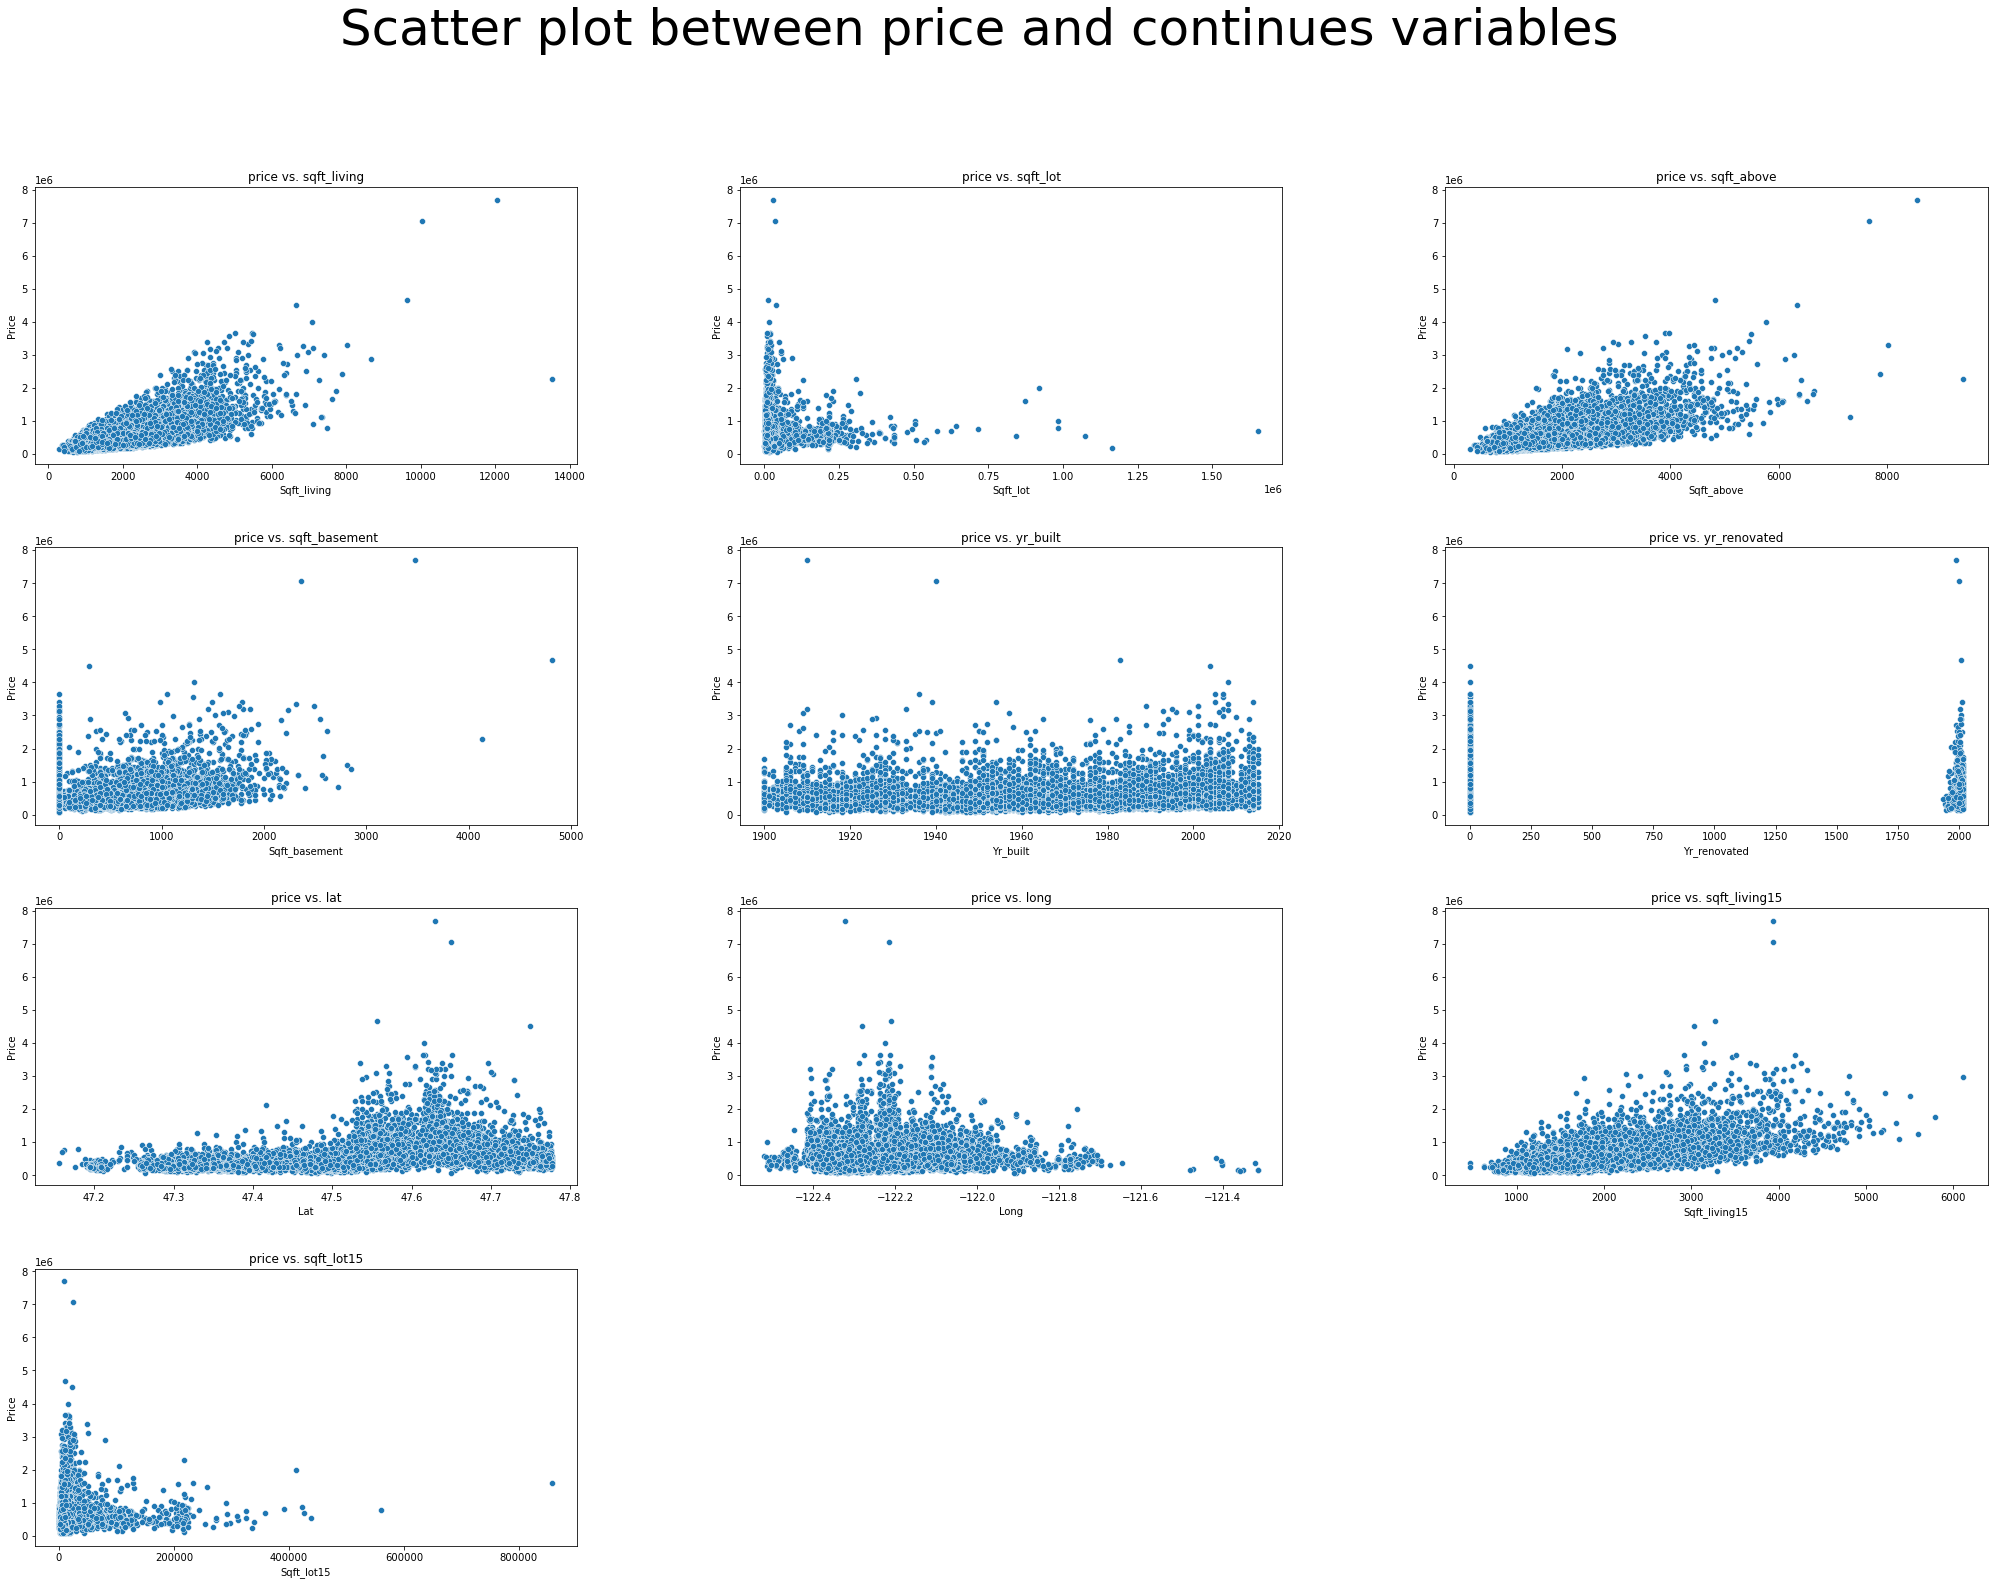

In [50]:
def plot_scatter_plot(data:pd.DataFrame, cols:list, title:str):
    """
    Plot scatter plot between price and continues variables
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    """
    figure = plt.figure(figsize=(35,25))
    figure.subplots_adjust(wspace=0.3, hspace=0.3)

    for i, col in enumerate(cols, start=1):
        ax = figure.add_subplot(4, 3, i)
        sns.scatterplot(x=col, y='price', data=data, ax=ax)
        ax.set_title(f'price vs. {col}')
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel('Price')

    figure.suptitle(title, fontsize=50)

plot_scatter_plot(data=df_train, cols=numerical_feat, title='Scatter plot between price and continues variables')

### price - categorical vars

*Correlation:*
- There is a positive correlation between **price** and **grade** & **bathrooms** & **sqft_above**.


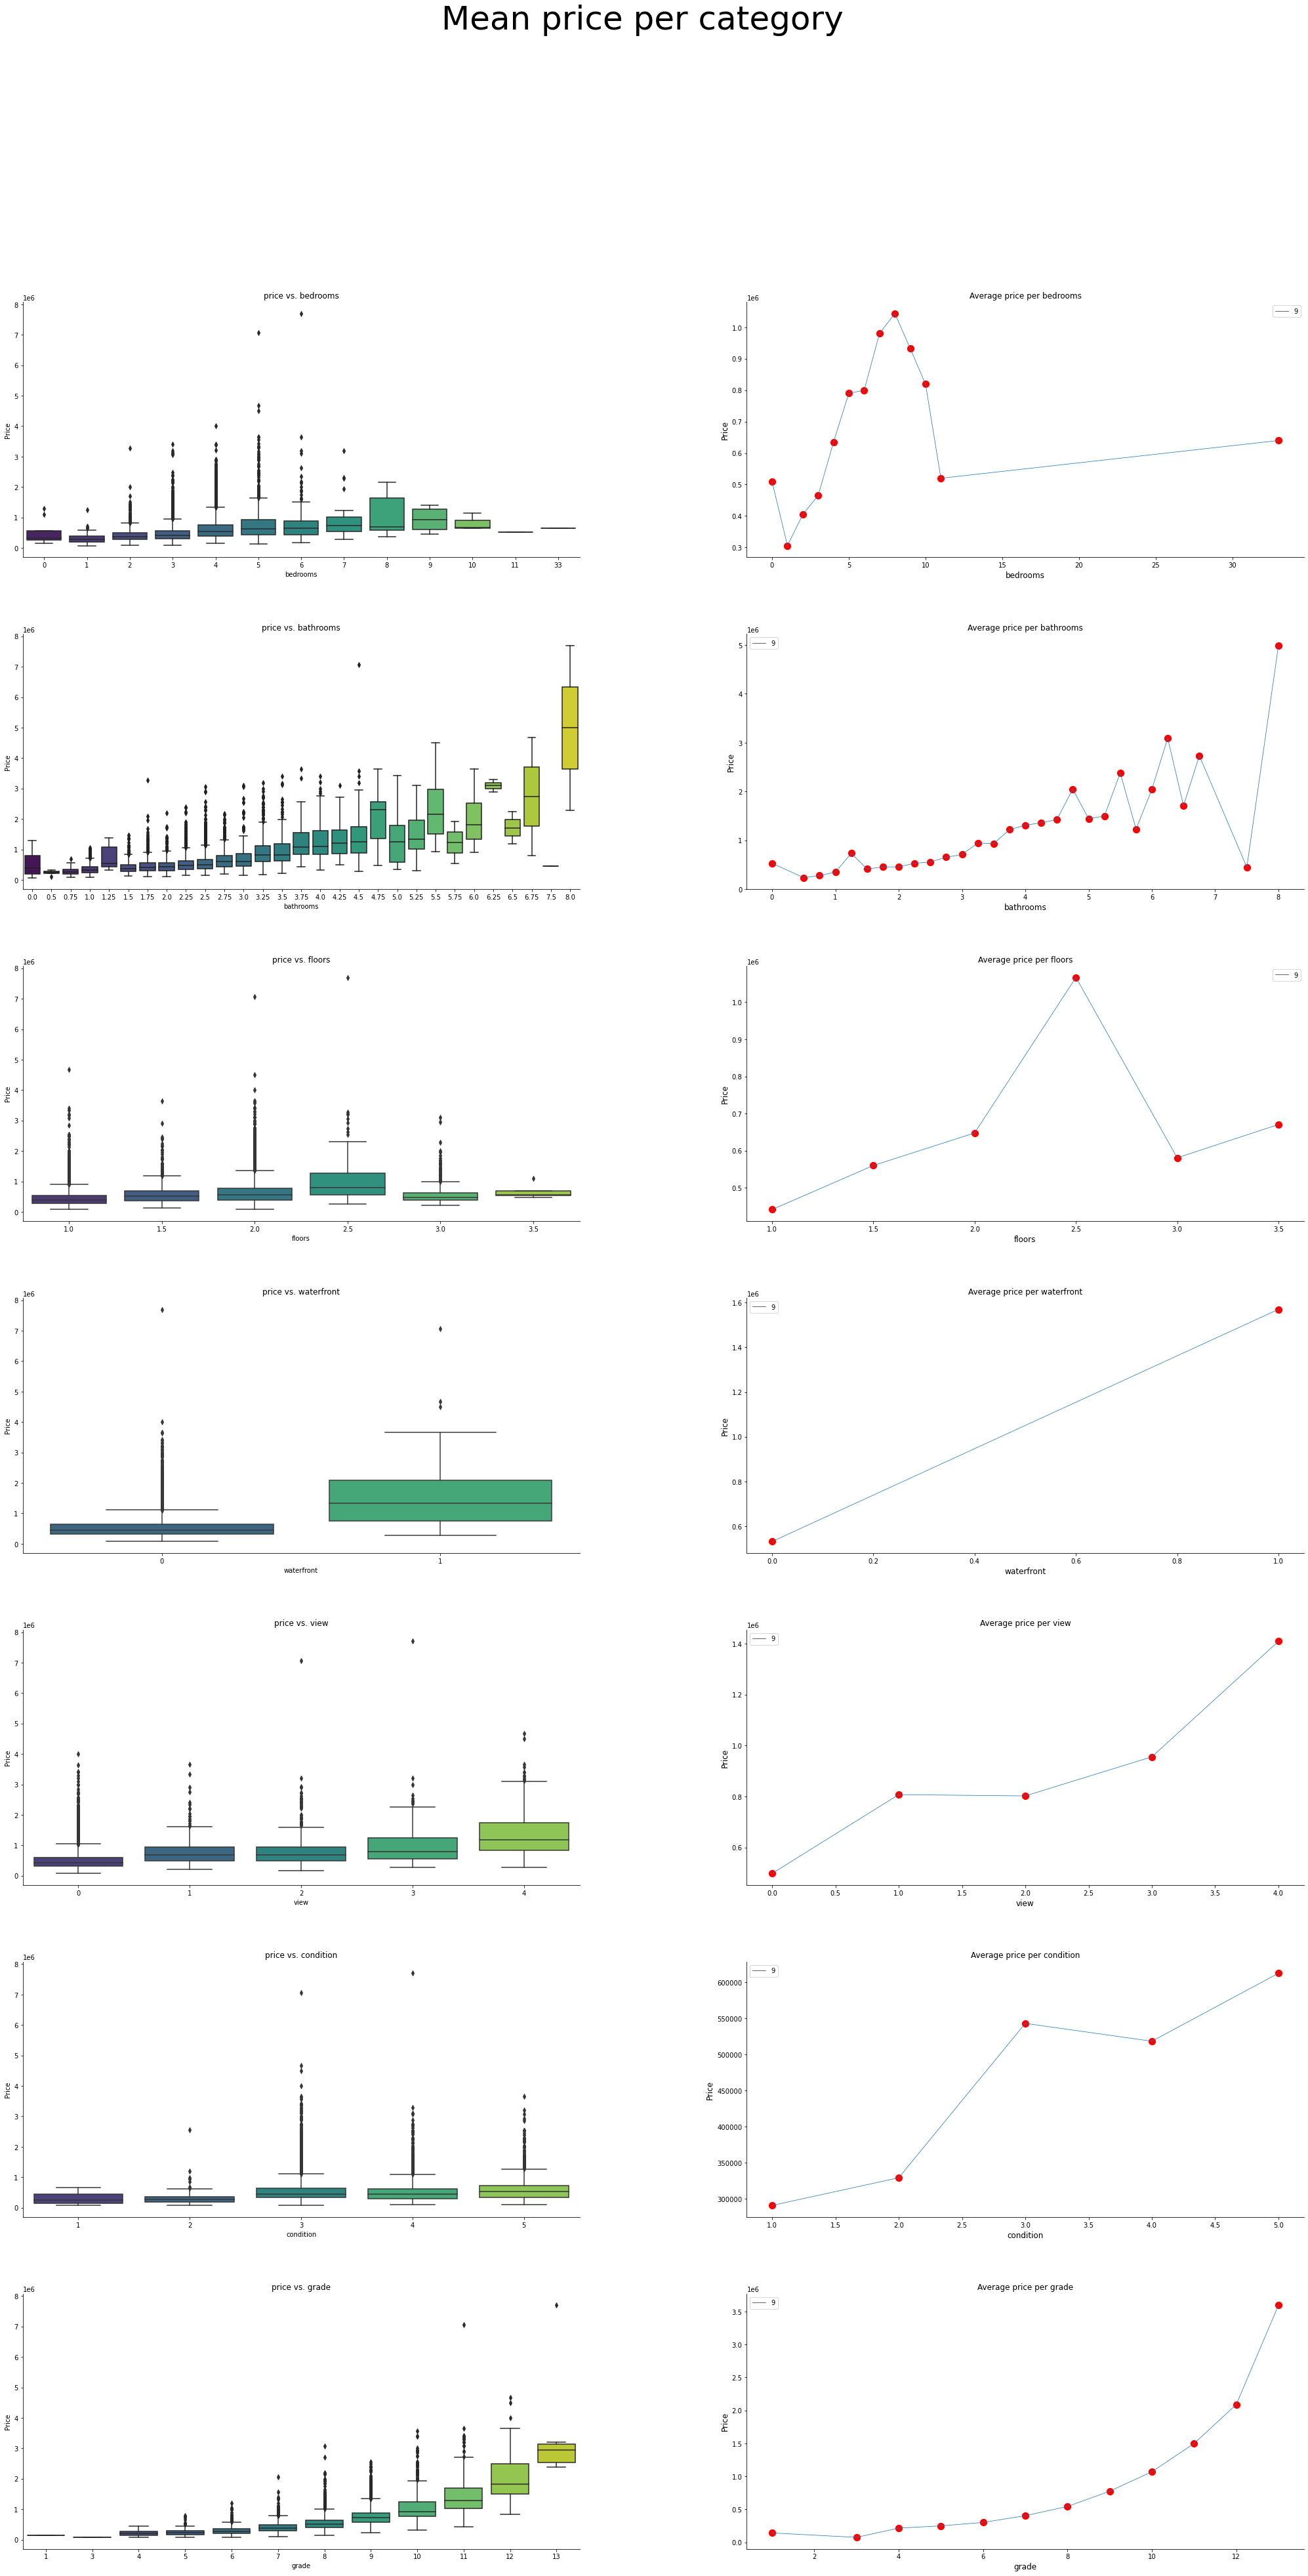

In [51]:
def plot_mean_box_plot(data:pd.DataFrame, cols:list, title:str):
    """
    Plot mean price grouped by categorical features as scatter plot
    
    Parameters
    ----------
    data : DataFrame
    cols : list of features
    """

    figure, axs = plt.subplots(nrows=len(cols), ncols=2, figsize=(35,len(cols)*9))
    figure.subplots_adjust(wspace=0.3, hspace=0.3)

    for i, col in enumerate(cols):
        grouped_data = data.groupby(col).mean()['price'].to_frame()
        grouped_data[col] = grouped_data.index
        grouped_data.rename(columns={0:'price'}, inplace=True)
        grouped_data.reset_index(drop=True, inplace=True)

        sns.boxplot(x=col, y='price', data=data, palette='viridis', ax=axs[i][0])
        axs[i][0].set_title(f'price vs. {col}')
        axs[i][0].set_ylabel('Price')

        sns.lineplot(x=col, y='price', data=grouped_data, size=9, ax=axs[i][1])
        sns.scatterplot(x=col, y='price', data=grouped_data, s=150, color='red', ax=axs[i][1])
        axs[i][1].set_title(f"Average price per {col}")
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel('Price', fontsize=12)
        sns.despine()

    figure.suptitle(title, fontsize=50)

plot_mean_box_plot(data=df_train, cols=categorical_feat, title='Mean price per category')

## Correlation matrix
Based on the **univariate analysis**, spearman correlation coefficient is the best way to check the correlation between the variables because the data is not normally distributed.


From the correlation matrix, the pairs of features with high correlation are:
- price         :{sqft_living, sqft_above, sqft_living15}
- sqft_living   :{sqft_above, sqft_living15}
- sqft_above    :{sqft_living15}
- sqft_lot      :{sqft_lot15}




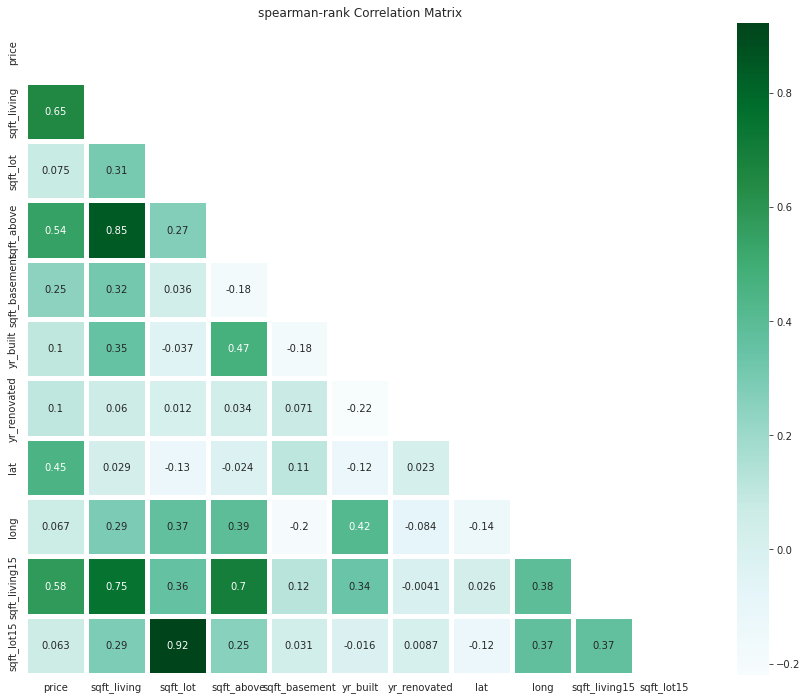

In [52]:
# Find the spearman correlation between features

def plot_corr_mat(data:pd.DataFrame, method='spearman'):
    corr_mat = data.corr(method=method) # corr method take only numeric vars


    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("whitegrid"): # white, dark, whitegrid, darkgrid, ticks
        f, ax = plt.subplots(figsize=(15, 12))
        ax = sns.heatmap(data=corr_mat, mask=mask, annot=True, annot_kws={'size':10}, linewidths=5, cmap=plt.cm.BuGn)
        ax.set_title(f'{method}-rank Correlation Matrix')

    return corr_mat

corr_mat = plot_corr_mat(df_train)

In [53]:
def find_corr_feat(corr_mat:np.array,  threshold:float) -> pd.DataFrame:
    """
    Find correlated features that have correlation value bigger than the threshold
        
        Parameters
        ----------
        data : DataFrame
        threshold : float
        
        Returns
        -------
        correlated_feat : DataFrame contains correlated features
    """
        
    corr_condition = corr_mat.where((corr_mat.abs() > threshold) & (corr_mat.abs() < 1.0), other=False).round(2)
    corr_vars = dict.fromkeys(corr_condition.columns, list())


    # we search for correlated values in triangular shape
    # for col_ind, col_name in enumerate(corr_condition.columns):
    #     for row_ind in range(col_ind+1):
    #         if(corr_condition.iloc[row_ind, col_ind]):
    #             corr_vars[col_name].append(corr_condition.index[row_ind])

    for col in corr_condition.columns:
        corr_vars[col] = corr_condition[corr_condition[col]!=False][col].index.to_list()

    # delete all keys that have no correlated features
    corr_vars = {k: v for k, v in corr_vars.items() if len(v) > 0}
        
    return corr_vars

# corr_vars = findCorrVars(X_train_new, 0.7)
# print("The most correlate features are: ", corr_vars)
find_corr_feat(corr_mat, 0.7)

{'sqft_living': ['sqft_above', 'sqft_living15'],
 'sqft_lot': ['sqft_lot15'],
 'sqft_above': ['sqft_living'],
 'sqft_living15': ['sqft_living'],
 'sqft_lot15': ['sqft_lot']}

## Multicollinearity Detecting
Variable Inflation Factors (VIF):
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In conclusion, sqft_living15 & sqft_lot15 could be predicted by other variables so we can delete them.

In [54]:
vif = pd.DataFrame()
vif_corr_values = df_train[numerical_feat].corr()
vif.index = vif_corr_values.columns
vif["VIF"] = [variance_inflation_factor(vif_corr_values.values, i) for i in range(vif_corr_values.shape[1])]
vif["Correlated to price"] = corr_mat['price']
vif.sort_values(by='Correlated to price', ascending=False)

,VIF,Correlated to price
sqft_living,inf,0.6464759898
sqft_living15,1802.5243825948,0.5757564590
sqft_above,inf,0.5440529133
lat,1.2491739845,0.4512133590
sqft_basement,inf,0.2474881885
yr_built,4.4078155969,0.1041796333
yr_renovated,1.4029847086,0.1015469763
sqft_lot,11.6151588432,0.0751864523
long,3.7458812757,0.0669453300
sqft_lot15,12.2812740971,0.0629126270


## Multivariate

In [55]:
# sns.pairplot(data=df_train[numerical_feat], corner=True, palette='RdYlGn')

# Outliers

### Using Box-whisker plot
The plotting reveals that there are some outliers at:
- price > 700000.
- sqft_living > 13000.
- sqft_lot > 1.5e6.
- sqft_basement > 4000.

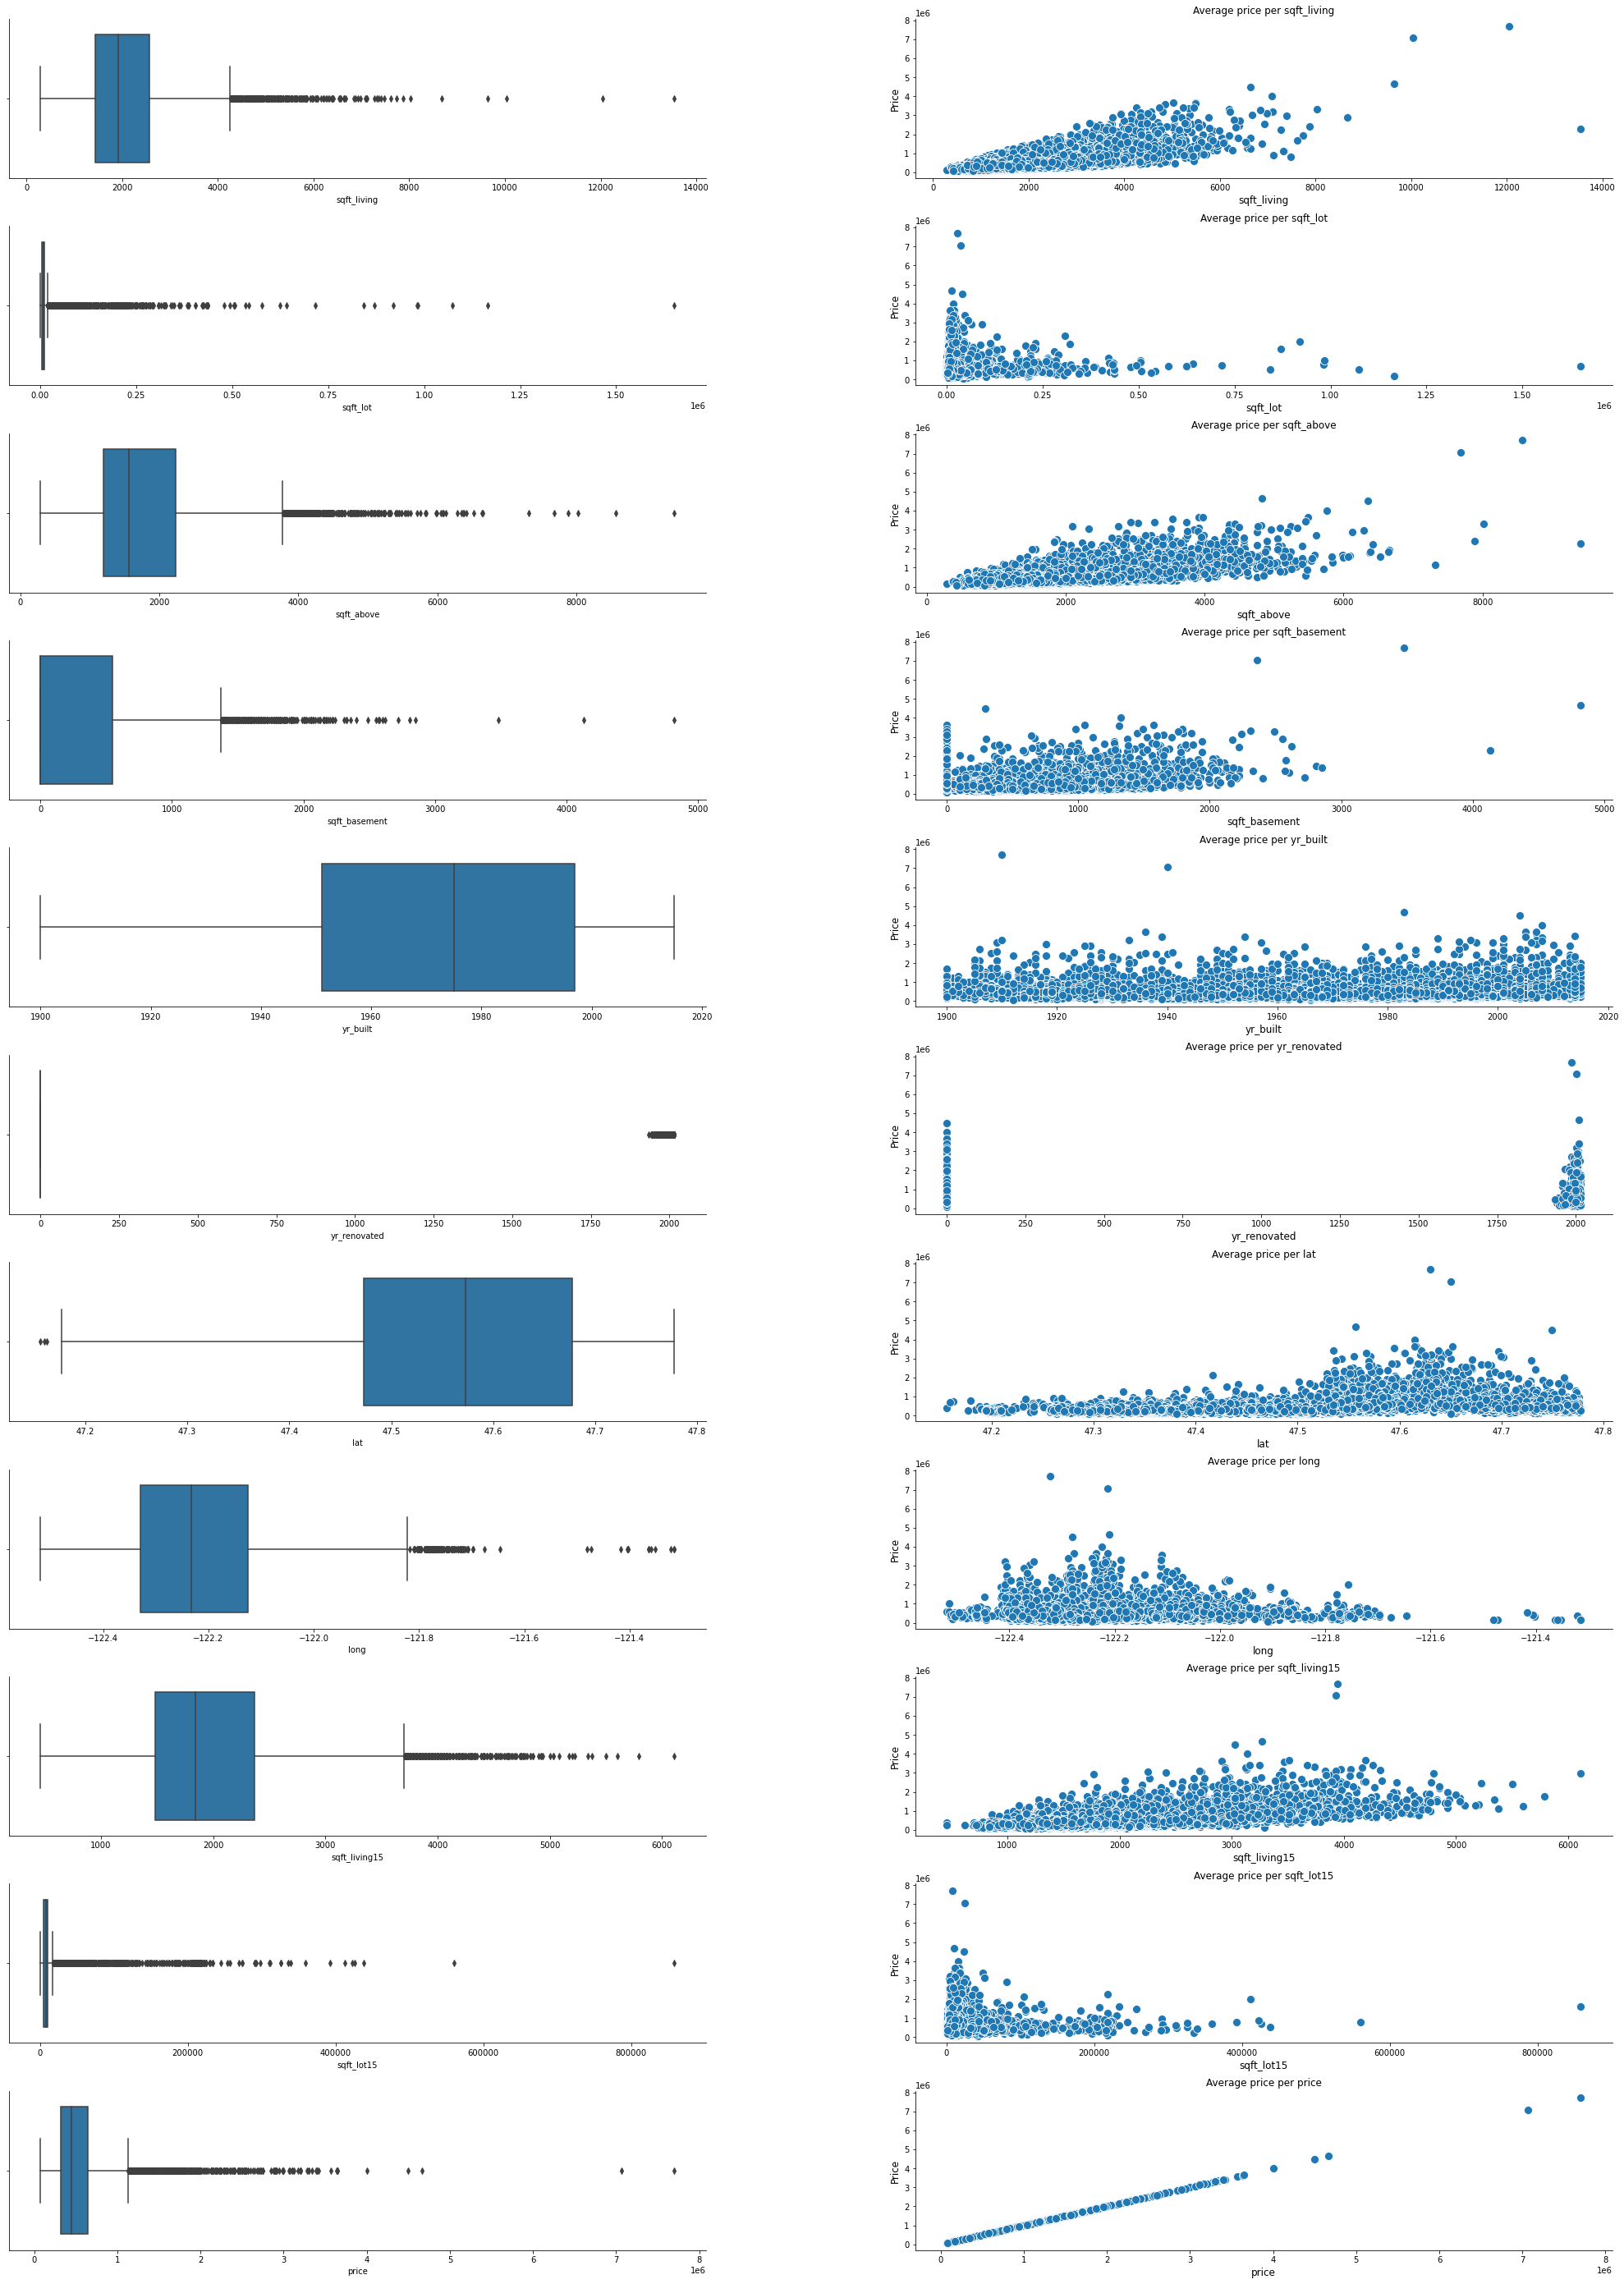

In [56]:
def plot_box_whisker_scatter(data:pd.DataFrame):
    """
    Plot box-whisker and scatter plot for numerical features
    
    Parameters
    ----------
    data : DataFrame
    """
    figure, axs = plt.subplots(nrows=len(data.columns), ncols=2, figsize=(35,50))
    figure.subplots_adjust(wspace=0.3, hspace=0.3)

    for i, col in enumerate(data.columns):
        sns.boxplot(x=col, data=data, ax=axs[i][0])

        sns.scatterplot(x=col, y='price', data=data, ax=axs[i][1], s=100)
        axs[i][1].set_title(f"Average price per {col}")
        axs[i][1].set_xlabel(col, fontsize=12)
        axs[i][1].set_ylabel('Price', fontsize=12)
        sns.despine()
        
plot_box_whisker_scatter(df_train[numerical_feat.to_list() + ['price']])



### Using Z-Score

In [57]:
def detect_outliers_zscore(series:pd.Series, threshold=3):
    zscores:np.array = np.abs(stats.zscore(series))
    dropped_index = list(np.where(zscores > threshold)[0])
    return dropped_index

    
outliers_zscore = detect_outliers_zscore(df_train['price'])

### Using IQR

In [58]:
def detect_outliers_iqr(series:pd.Series, threshold=1.5):
    quartile_1, quartile_3 = series.quantile([0.25, 0.75])

    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * threshold)
    upper_bound = quartile_3 + (iqr * threshold)
    
    dropped_index = series[(series < lower_bound) | (series > upper_bound)].index
    return dropped_index

outliers_iqr = detect_outliers_iqr(df_train['price'])

### Using percentile

In [59]:
def detect_outliers_percentile(series:pd.Series):
    quartile_10, quartile_90 = series.quantile([0.1, 0.9])
 
    dropped_index = series[(series < quartile_10) | (series > quartile_90)].index
    return dropped_index

outliers_perc = detect_outliers_percentile(df_train['price'])

### Outliers Removing

In [60]:
index_condition = df_train[
    (df_train['price']>7_000_000) | (df_train['sqft_living']>13_000) | (df_train['sqft_lot']>1.5e6) | (df_train['sqft_basement']>4_000) | (df_train['sqft_lot15']>8_00_000)
].index
df_train_no_outliers = df_train.drop(index= index_condition)

# Train/Test split

In [61]:
X_train, y_train = df_train_no_outliers.drop(columns=['price']), df_train_no_outliers['price']
X_test, y_test = df_test.drop(columns=['price']), df_test['price']

# Feature Engineering

## Creating columns

### Binning
After preprocessing and creating new columns. The new **age** & **age_renovated** columns aren't make good pattern for predicting the price.

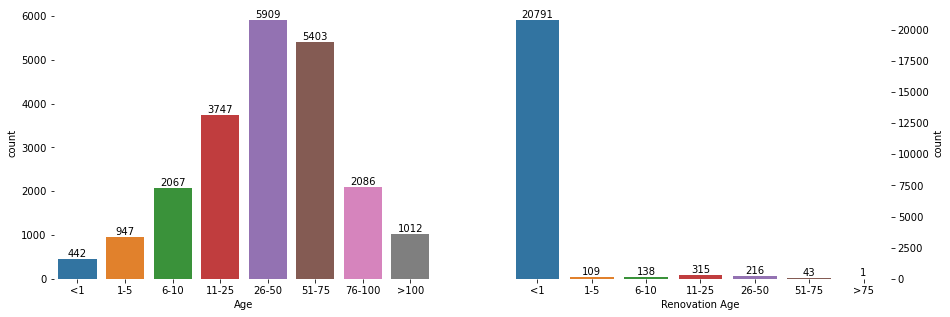

In [62]:
# Take year of construction as a feature
df_house_full['yr_sale'] = df_house_full['date'].str[:4].astype(int)

# subtract yr_sales from yr_built and put in age feature
df_house_full['age'] = df_house_full['yr_sale'] - df_house_full['yr_built'] 

# subtract yr_sales from yr_renovated and put in age_renovated feature
df_house_full['age_renovated'] = df_house_full['yr_sale'][df_house_full['yr_renovated']!=0] - df_house_full['yr_renovated'][df_house_full['yr_renovated']!=0].astype(int)
df_house_full['age_renovated'] = df_house_full['age_renovated'].fillna(0).astype(int)


# binned those new features for categorizing
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']

df_house_full['age_binned'] = pd.cut(df_house_full['age'], bins=bins, labels=labels)

bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_house_full['age_renovated_binned'] = pd.cut(df_house_full['age_renovated'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_house_full['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_house_full['age_renovated_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');


### Encoding

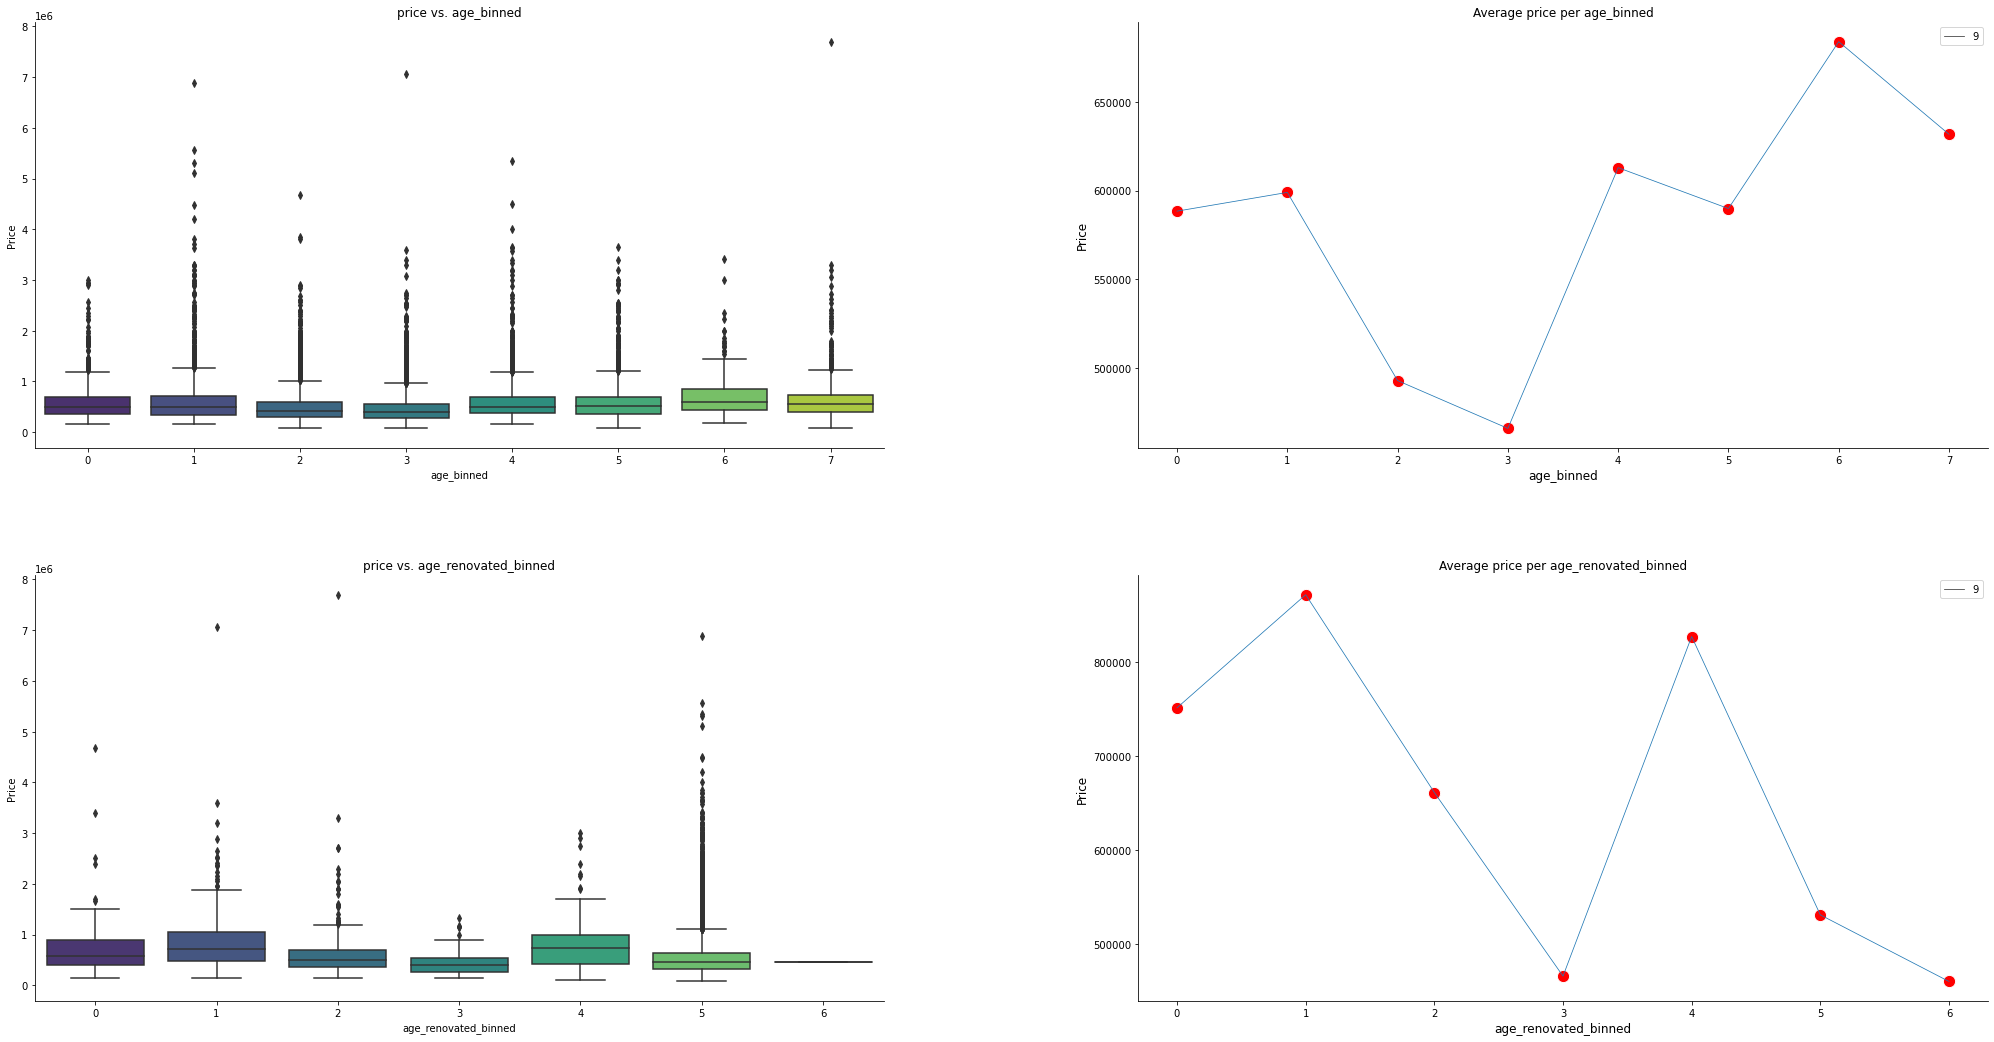

In [63]:
encoder = LabelEncoder()
df_house_full['age_binned'] = encoder.fit_transform(df_house_full['age_binned'])
df_house_full['age_renovated_binned'] = encoder.fit_transform(df_house_full['age_renovated_binned'])

plot_mean_box_plot(df_house_full.drop(columns=['id','date']), cols=['age_binned','age_renovated_binned'], title='')

## Features selection

In [64]:
# Remove some correlated features
corr_features = ['sqft_living15', 'sqft_above', 'sqft_lot15'] 
# numerical_feat = numerical_feat.drop(corr_features)
# X_train = X_train.drop(columns=corr_features)
# X_test = X_test.drop(columns=corr_features)


In [65]:
@dataclass
class TestResult:
    """class for storing test results"""
    specs: list[str]
    scores: list[Union[int, float]]
    res: pd.DataFrame = field(init=False, repr=False)

    def __post_init__(self):
        # Grouping results in DataFrame
        self.res = pd.DataFrame()
        self.res['Specs'] = self.specs
        self.res['Score'] = self.scores

@dataclass
class FeatureRank:
    """
    class for holding feature ranking
    """

    func: Callable[[pd.DataFrame, pd.DataFrame], list[float]]
    X: pd.DataFrame
    y: pd.DataFrame
    test_result: TestResult = field(init=False)


    
    def __post_init__(self):
        """Call it after initialize a new instance"""
        
        # Calculate feature ranking
        score_vals, feats = self.func(self.X, self.y)
        
        # Create test result
        ranks = score_vals[0] if(len(score_vals)==2) else score_vals

        # Normalize ranks
        ranks = (ranks - ranks.min()) / (ranks.max() - ranks.min())

        self.test_result = TestResult(feats, ranks)

        # Change the index of the DataFrame
        self.test_result.res.index = [self.X.columns.get_loc(spec) for spec in self.test_result.res['Specs']]
    
    def get_largest_score(self, n:Union[int, str] = 'auto') -> list[str]:
        """Get the largest n scores"""
        if(isinstance(n, str) and n=='auto'):
            n = self.test_result.res.shape[0]
        
        return self.test_result.res.nlargest(n, columns=['Score'])['Specs'].values

    def feat_imp_plot(self, title, sorting=False):
        """Plot feature importance as bar plot"""

        # Take copy of result to avoid modifying on original result
        result = self.test_result.res.copy()
        
        if(sorting):
            result = result.sort_values(by='Score', ascending=False)
            
        fig = plt.figure(figsize=(20,8))
        ax  = fig.add_subplot()
        axs = sns.barplot(x='Specs', y='Score', data=result, palette = 'viridis', ax=ax)

        # Add rank values as annotation to bars 
        for p in axs.patches:
            axs.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()))
        plt.box(False)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('\n Features')
        ax.set_ylabel('Importance \n')
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)

        return ax

        

### Correlation

<AxesSubplot:title={'center':'Correlation - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

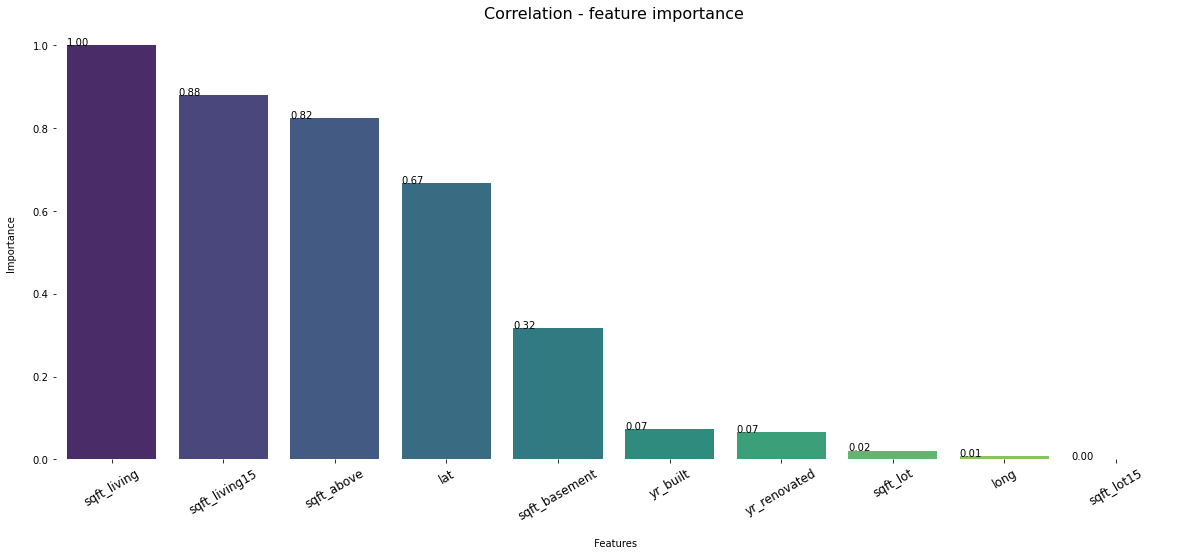

In [66]:
def corr_score(X:pd.DataFrame, y:pd.Series):
    """Calculate target-vars correlation """
    
    # Get entire data
    data = pd.concat([X, y], axis=1)

    # Change data columns after combination
    data.columns = X.columns.to_list() + [y.name]
    
    # Calculate the correlation matrix
    corr_mat = data.corr(method='spearman')

    # get correlated values with target
    target_corr_values = corr_mat['price'].to_numpy()[:-1]

    
    return target_corr_values, corr_mat['price'].index[:-1]

corr_rank = FeatureRank(corr_score, X_train, y_train)
corr_rank.feat_imp_plot(title='Correlation - feature importance', sorting=True)

### Feature importance - Entropy

<AxesSubplot:title={'center':'Mutual Info - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

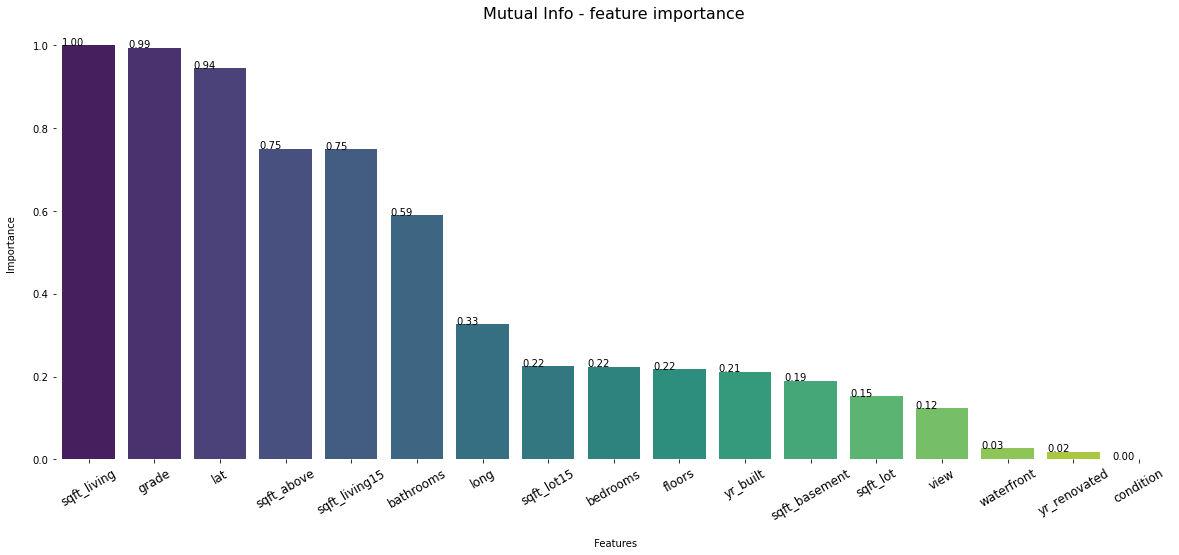

In [33]:
def mutual_info_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    mutual_info = mutual_info_regression(X, y)
    return mutual_info, X.columns

mutual_info_rank = FeatureRank(mutual_info_score, X_train, y_train)
mutual_info_rank.feat_imp_plot('Mutual Info - feature importance', sorting=True)

### Tree-Based

<AxesSubplot:title={'center':'Tree-Based - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

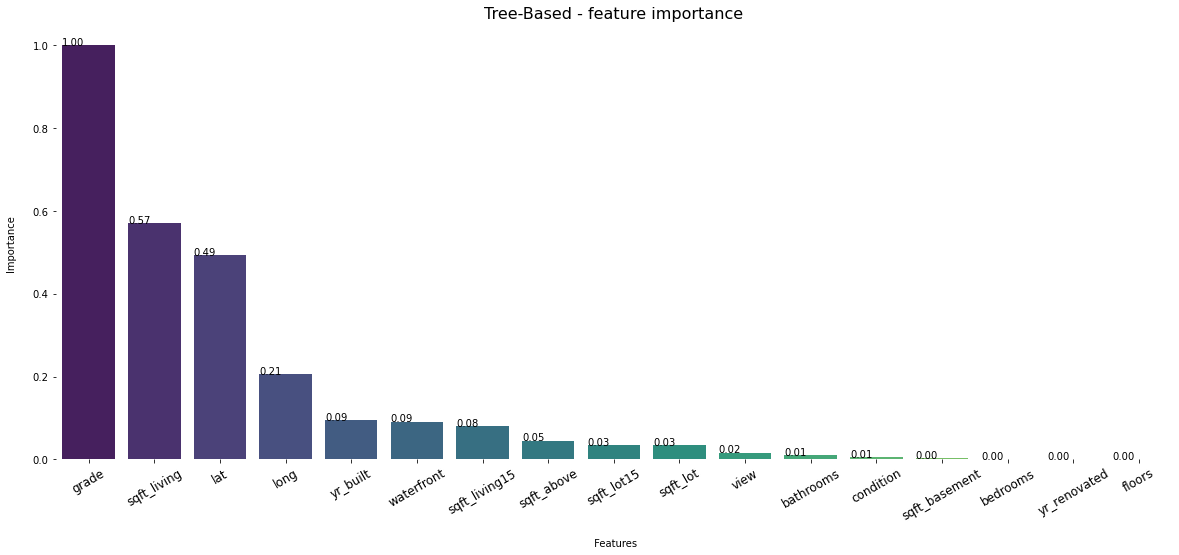

In [34]:
def tree_based_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    dt_model_selector = DecisionTreeRegressor()
    dt_model_selector.fit(X, y)
    return dt_model_selector.feature_importances_, X.columns

tree_based_rank = FeatureRank(tree_based_score, X_train, y_train)
tree_based_rank.feat_imp_plot('Tree-Based - feature importance', sorting=True)

## Features Transformation
- Since the goal is to use **Linear Regression** which is considered as **Gradient-based** algorithm.Then, numerical variables should be **Normally** distributed.
- **Min-Max** scaler and **Standard** scaler are very sensitive to the *presence* of outliers.


In [35]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

### QuantileTransformer

In [36]:
rng = np.random.RandomState(304)

# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt_scaler = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)

X_train_norm.iloc[:,:] = qt_scaler.fit_transform(X_train_norm.iloc[:,:])
X_test_norm.iloc[:,:] = qt_scaler.transform(X_test_norm.iloc[:,:])

y_train_norm = pd.Series(qt_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel(), name='price')
y_test_norm = pd.Series(qt_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel(), name='price')

### Min-Max Scaler
- It rescales the data to a range between 0 and 1.

In [67]:
# Normalize all features because categorical feature won't be affected
norm_scaler = MinMaxScaler()

X_train_norm.iloc[:,:] = norm_scaler.fit_transform(X_train_norm.iloc[:,:])
X_test_norm.iloc[:,:] = norm_scaler.transform(X_test_norm.iloc[:,:])

y_train_norm = pd.Series(norm_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel(), name='price')
y_test_norm = pd.Series(norm_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel(), name='price')

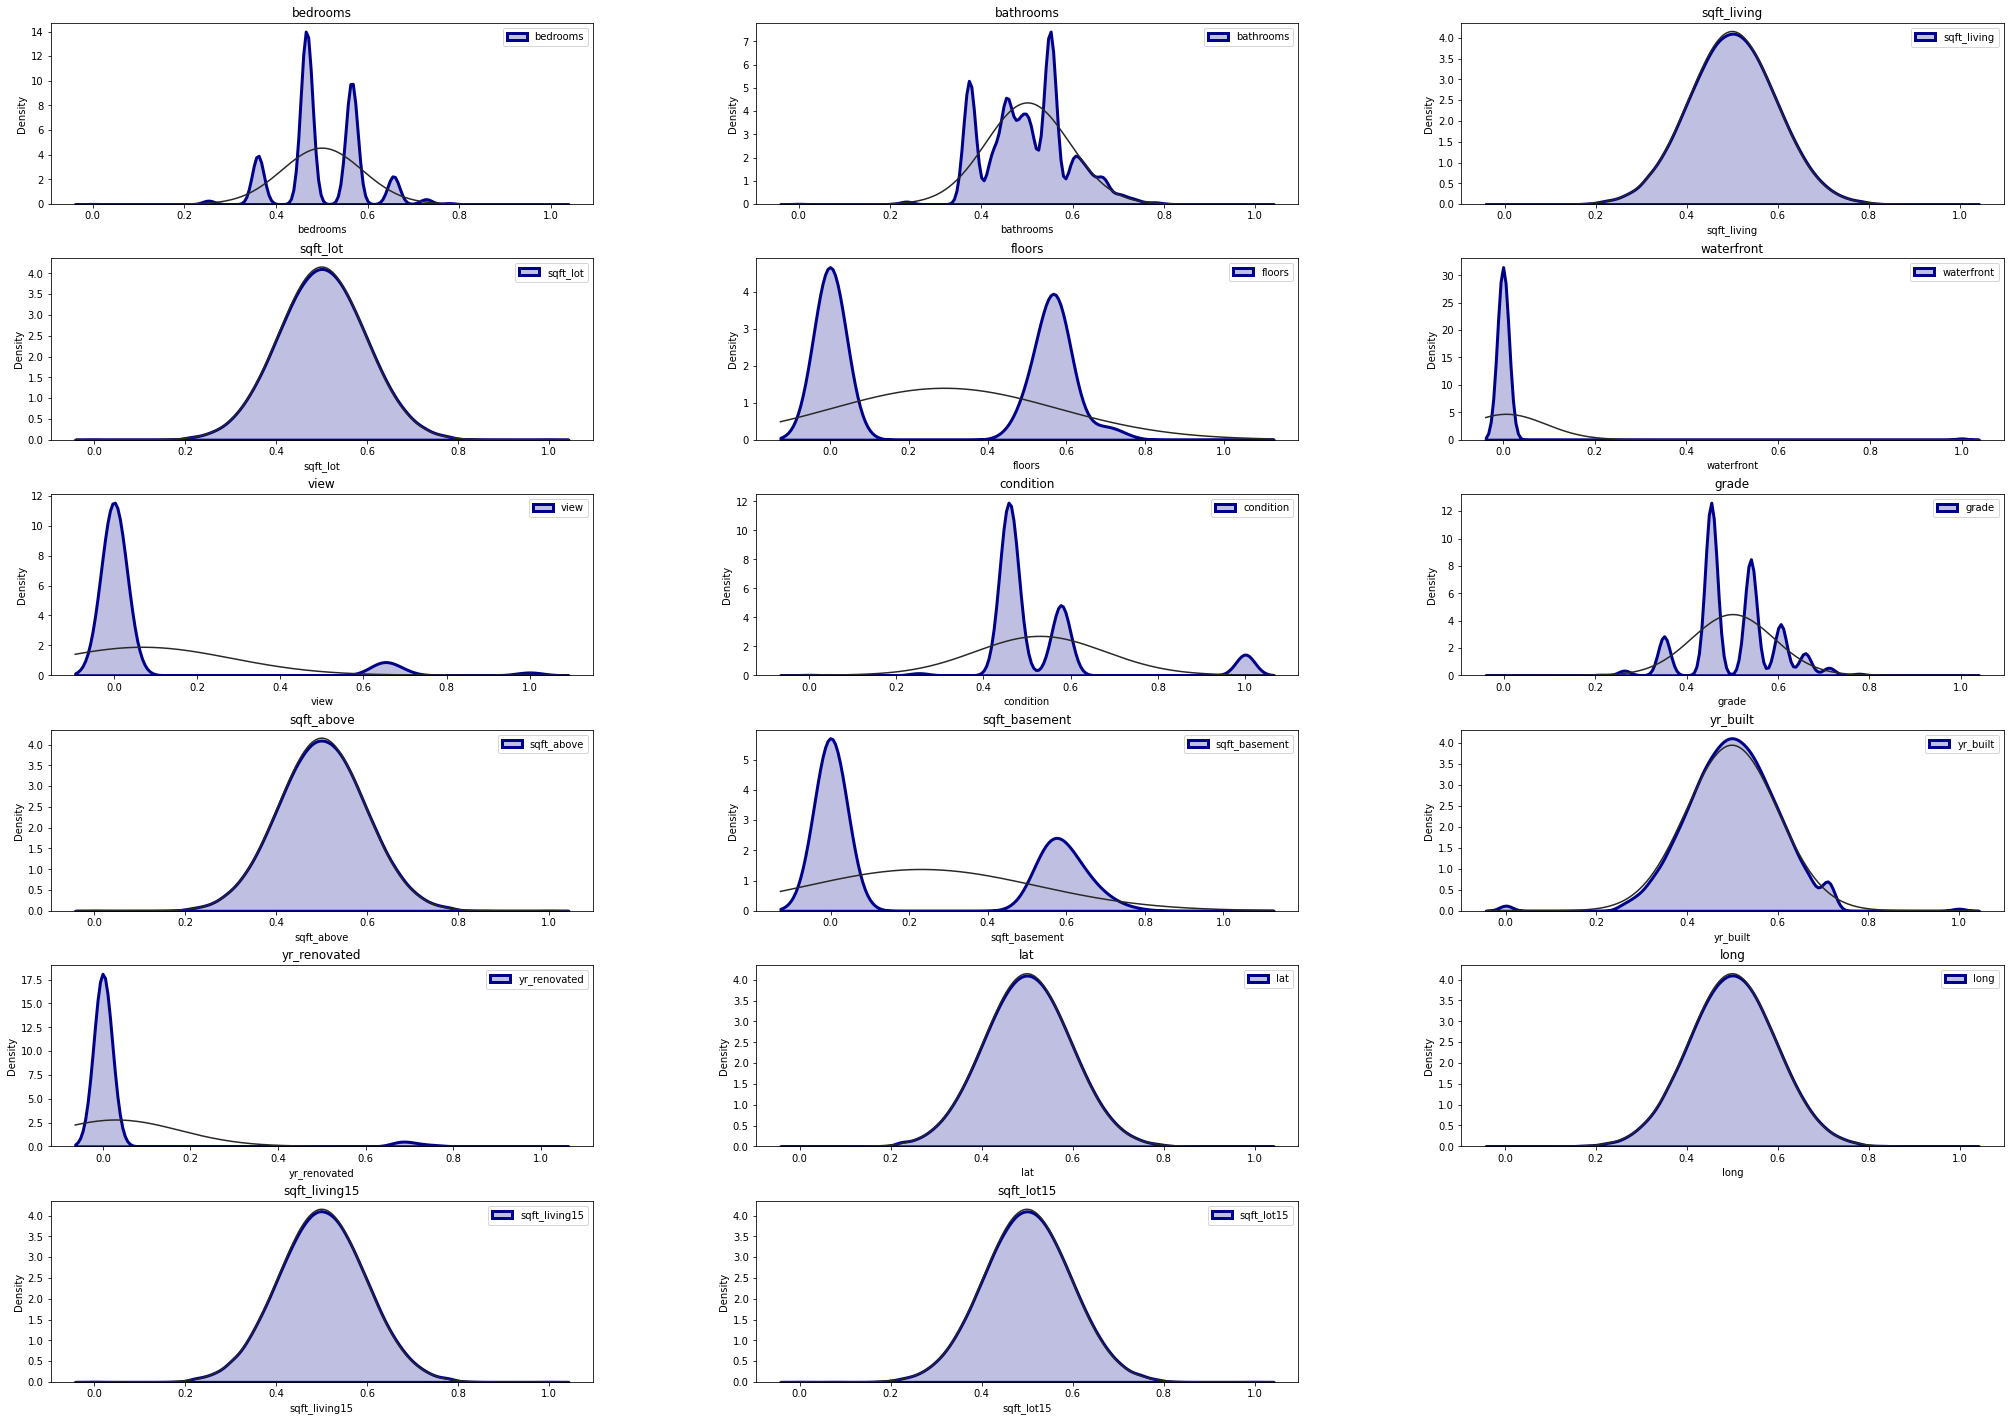

In [69]:
plot_kde(X_train_norm)